# Einstieg: Analyse und Verarbeitung von Bürgeranfragen

In diesem Notebook wird ein erster Blick auf den Datensatz geworfen sowie grundlegende Textverarbeitung durchgeführt.

In [15]:
# 1. Daten laden
import pandas as pd

df = pd.read_csv("../data/raw/buergeranfragen_sample.csv", sep=";")

# Überblick
print(df.head())
print("\nKategorien:")
print(df["kategorie"].value_counts())

                                        anfrage kategorie
0    Meine Mülltonne wurde heute nicht geleert.    Abfall
1      Seit Tagen liegt Sperrmüll vor dem Haus.    Abfall
2  Wann ist die nächste Abholung von Altpapier?    Abfall
3             Die Wertstoffinsel ist überfüllt.    Abfall
4    Warum wurde mein Bioabfall nicht abgeholt?    Abfall

Kategorien:
kategorie
Abfall           10
Dokumente        10
Infrastruktur    10
Verkehr          10
Bau              10
Sonstiges        10
Name: count, dtype: int64


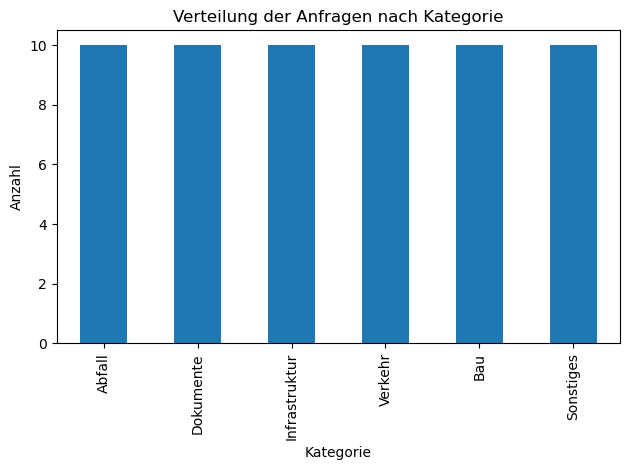

In [16]:
# 2. Visualisierung der Kategorien
import matplotlib.pyplot as plt

df["kategorie"].value_counts().plot(kind="bar", title="Verteilung der Anfragen nach Kategorie")
plt.ylabel("Anzahl")
plt.xlabel("Kategorie")
plt.tight_layout()
plt.show()

In [17]:
# 3 Text-Vorverarbeitung: Kleinschreibung, Satzzeichen entfernen, einfache Tokenisierung
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

df["clean_text"] = df["anfrage"].apply(clean_text)

# Einfache Tokenisierung per .split()
df["tokens"] = df["clean_text"].apply(lambda x: x.split())

# Beispielhafte Ausgabe
print("\nBeispiel (vorher/nachher):")
print(df[["anfrage", "clean_text", "tokens"]].head())



Beispiel (vorher/nachher):
                                        anfrage  \
0    Meine Mülltonne wurde heute nicht geleert.   
1      Seit Tagen liegt Sperrmüll vor dem Haus.   
2  Wann ist die nächste Abholung von Altpapier?   
3             Die Wertstoffinsel ist überfüllt.   
4    Warum wurde mein Bioabfall nicht abgeholt?   

                                    clean_text  \
0    meine mülltonne wurde heute nicht geleert   
1      seit tagen liegt sperrmüll vor dem haus   
2  wann ist die nächste abholung von altpapier   
3             die wertstoffinsel ist überfüllt   
4    warum wurde mein bioabfall nicht abgeholt   

                                              tokens  
0   [meine, mülltonne, wurde, heute, nicht, geleert]  
1    [seit, tagen, liegt, sperrmüll, vor, dem, haus]  
2  [wann, ist, die, nächste, abholung, von, altpa...  
3              [die, wertstoffinsel, ist, überfüllt]  
4   [warum, wurde, mein, bioabfall, nicht, abgeholt]  
